# **Cryptocurrency Portfolio Optimization**

---

‎ 

**Library for project**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **Reading Data**

In [2]:
data = pd.read_csv('btc.csv')

In [3]:
data.head()

,snapped_at,price,market_cap,total_volume
0,2013-04-28 00:00:00 UTC,135.30,1.500518e+09,0.0
1,2013-04-29 00:00:00 UTC,141.96,1.575032e+09,0.0
2,2013-04-30 00:00:00 UTC,135.30,1.501657e+09,0.0
3,2013-05-01 00:00:00 UTC,117.00,1.298952e+09,0.0
4,2013-05-02 00:00:00 UTC,103.43,1.148668e+09,0.0


In [172]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4032 entries, 0 to 4031
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   snapped_at    4032 non-null   object 
 1   price         4032 non-null   float64
 2   market_cap    4031 non-null   float64
 3   total_volume  4032 non-null   float64
dtypes: float64(3), object(1)
memory usage: 126.1+ KB


In [4]:
data.describe()

,price,market_cap,total_volume
count,4032.000000,4.031000e+03,4.032000e+03
mean,14218.087405,2.674182e+11,1.477465e+10
std,17592.623038,3.382919e+11,1.840498e+10
min,67.809000,7.713681e+08,0.000000e+00
25%,591.735425,8.032536e+09,2.298621e+08
50%,7059.860043,1.247197e+11,4.994363e+09
75%,23160.850215,4.433360e+11,2.470577e+10
max,73097.767027,1.436631e+12,1.788941e+11


**Rename Column Name**

---

In [5]:
data.rename(columns={'snapped_at':'Time','market_cap':'MarketCap','total_volume':'volume'},inplace=True)

In [6]:
data.head()

,Time,price,MarketCap,volume
0,2013-04-28 00:00:00 UTC,135.30,1.500518e+09,0.0
1,2013-04-29 00:00:00 UTC,141.96,1.575032e+09,0.0
2,2013-04-30 00:00:00 UTC,135.30,1.501657e+09,0.0
3,2013-05-01 00:00:00 UTC,117.00,1.298952e+09,0.0
4,2013-05-02 00:00:00 UTC,103.43,1.148668e+09,0.0


***Cleaning Time Column***

----

In [7]:
def count(x):
    for i in (x):
        x = x[:10]
    return x

In [8]:
data['Time'] = data['Time'].apply(count)

In [9]:
data.tail()

,Time,price,MarketCap,volume
4027,2024-05-09,61215.504009,1.203919e+12,2.030383e+10
4028,2024-05-10,63148.599943,1.240911e+12,2.583772e+10
4029,2024-05-11,60888.216750,1.199394e+12,2.398752e+10
4030,2024-05-12,60776.972079,1.197103e+12,1.212062e+10
4031,2024-05-13,61507.054004,1.211278e+12,1.304570e+10


# **Data visualization**

In [11]:
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

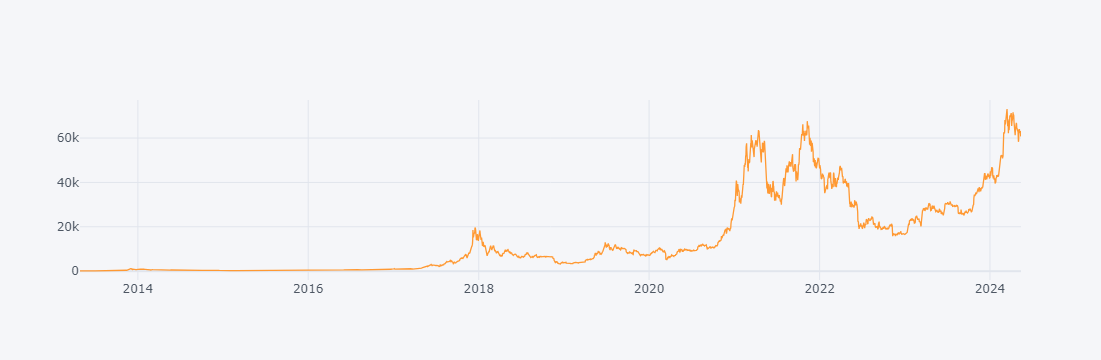

In [59]:
data.iplot( x='Time' , y='price')

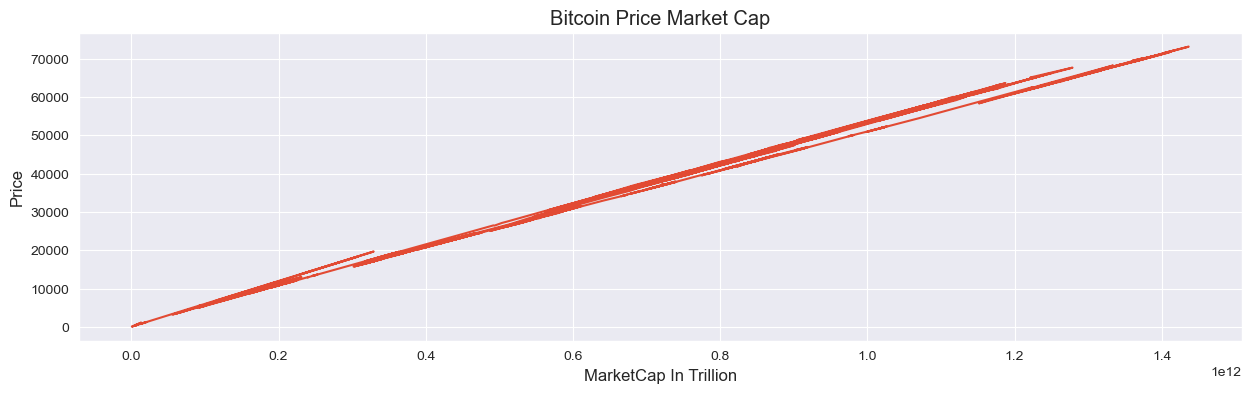

In [62]:
plt.style.use('ggplot')
sns.set_style('darkgrid')
plt.figure(figsize=(15,4))
plt.plot( data['MarketCap'] ,data['price'])
plt.title('Bitcoin Price Market Cap')
plt.ylabel('Price')
plt.xlabel('MarketCap In Trillion')
plt.show()

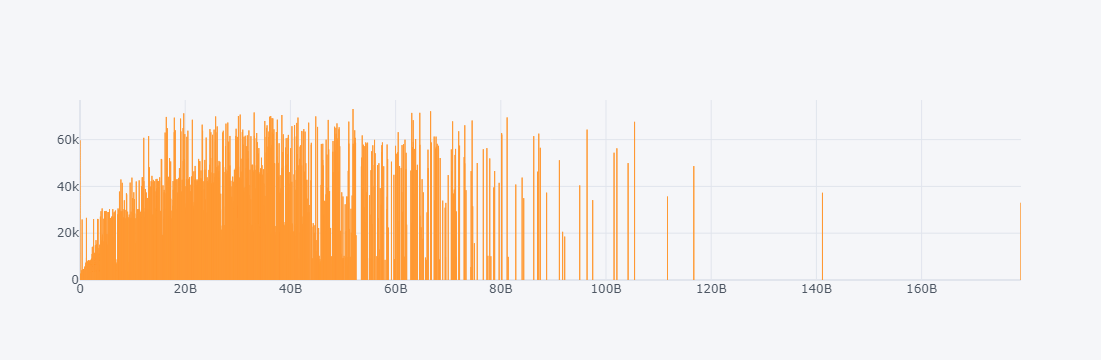

In [69]:
data.iplot(kind='bar',x='volume' ,y='price')

# **Rollmean & Rollstd**

In [14]:
data['rollmean'] = data['price'].rolling(window=12).mean()
data['rollstd'] = data['price'].rolling(window=12).std()

In [17]:
data

,Time,price,MarketCap,volume,rollmean,rollstd
0,2013-04-28,135.300000,1.500518e+09,0.000000e+00,NaN,NaN
1,2013-04-29,141.960000,1.575032e+09,0.000000e+00,NaN,NaN
2,2013-04-30,135.300000,1.501657e+09,0.000000e+00,NaN,NaN
3,2013-05-01,117.000000,1.298952e+09,0.000000e+00,NaN,NaN
4,2013-05-02,103.430000,1.148668e+09,0.000000e+00,NaN,NaN
...,...,...,...,...,...,...
4027,2024-05-09,61215.504009,1.203919e+12,2.030383e+10,62162.368776,1905.464986
4028,2024-05-10,63148.599943,1.240911e+12,2.583772e+10,62131.648043,1884.491539
4029,2024-05-11,60888.216750,1.199394e+12,2.398752e+10,61953.129970,1893.056053
4030,2024-05-12,60776.972079,1.197103e+12,1.212062e+10,61701.404341,1825.099445


# **Visualization Rollmean & Rollstd**

---

In [43]:
df = data[['Time' , 'price','rollmean', 'rollstd']]

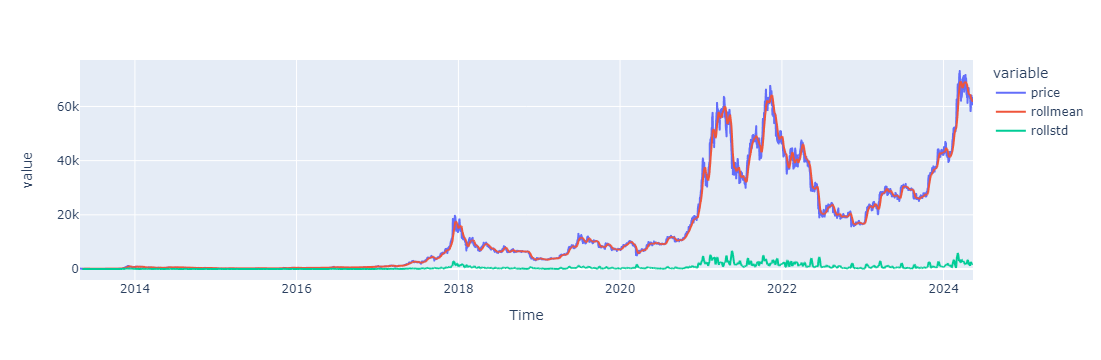

In [42]:
import plotly.express as px
fig = px.line(df,x='Time',y=df.columns)
fig.show()

# **Check Data Stationary OR Not**

In [127]:
def TestStationary(dataframe,val):
    dataframe['rollmean'] = dataframe[val].rolling(window=12).mean()
    dataframe['rollstd'] = dataframe[val].rolling(window=12).std()
    
    from statsmodels.tsa.stattools import adfuller
    result = adfuller(dataframe[val], autolag='AIC')
    stats = pd.Series(result[0:4],index=['Text Statistic','p-value','flags used','number of observation used'])
    print(stats)
    
    for keys,values in result[4].items():
        print('Critically',keys,':',values)

In [57]:
# Important Note!

# Text Statistic < Critically | Mean Data is Stationary
# Critically < Text Statistic | Data is not Stationary Its need to be stationary

In [51]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data['price'],autolag='AIC')
result

(-0.9079367724027053,
 0.7853474890226592,
 28,
 4003,
 {'1%': -3.431984648591583,
  '5%': -2.862262298327622,
  '10%': -2.5671544870656278},
 64704.44919312264)

In [53]:
stats = pd.Series(result[0:4],index=['Text Statistic','p-value','flags used','number of observation used'])
stats

Text Statistic                  -0.907937
p-value                          0.785347
flags used                      28.000000
number of observation used    4003.000000
dtype: float64

In [54]:
for keys,values in result[4].items():
    print('Critically',keys,': ',values)

Critically 1% :  -3.431984648591583
Critically 5% :  -2.862262298327622
Critically 10% :  -2.5671544870656278


In [55]:
p_value = stats[1]
if p_value < 0.05:
    print("Reject null hypothesis. Data is stationary.")
else:
    print("Fail to reject null hypothesis. Data is non-stationary.")

Fail to reject null hypothesis. Data is non-stationary.


In [60]:
# Data Is Not Stationary So we need to make Stationary
# Three Way | Simple Way is to make data stationary
# Time Shift       |         Log                |      Square Root , cube Root

In [189]:
df = data[['Time' , 'price']]
df.reset_index(drop=True,inplace=True)
df.set_index('Time',inplace=True)
df.head()

,price
Time,
2013-04-28,135.30
2013-04-29,141.96
2013-04-30,135.30
2013-05-01,117.00
2013-05-02,103.43


In [104]:
df['shift'] = df['price'].shift()
df['shiftdiff'] = df['price'] - df['shift'] 
df.head()

,price,shift,shiftdiff
Time,,,
2013-04-28,135.30,NaN,NaN
2013-04-29,141.96,135.30,6.66
2013-04-30,135.30,141.96,-6.66
2013-05-01,117.00,135.30,-18.30
2013-05-02,103.43,117.00,-13.57


In [106]:
TestStationary(df.dropna(),'shiftdiff')

Text Statistic               -9.700979e+00
p-value                       1.072427e-16
flags used                    3.100000e+01
number of observation used    3.988000e+03
dtype: float64
Critically 1% : -3.4319908009332663
Critically 5% : -2.8622650160989567
Critically 10% : -2.5671559338924497


**Using Log**
---

In [98]:
df = data[['Time' , 'price']]
df.reset_index(drop=True,inplace=True)
df.set_index('Time',inplace=True)

In [91]:
df['log'] = np.log(df['price'])

In [93]:
df.head(3)

,price,log
Time,,
2013-04-28,135.30,4.907495
2013-04-29,141.96,4.955545
2013-04-30,135.30,4.907495


In [94]:
TestStationary(df,'log')

Text Statistic                  -1.249817
p-value                          0.651807
flags used                      11.000000
number of observation used    4020.000000
dtype: float64
Critically 1% : -3.4319777314769095
Critically 5% : -2.862259242714302
Critically 10% : -2.567152860387119


**Using Sqrt**
---

In [168]:
df = data[['Time' , 'price']]
df.reset_index(drop=True,inplace=True)
df.set_index('Time',inplace=True)

In [99]:
df['log'] = np.sqrt(df['price'])
df.head(3)

,price,log
Time,,
2013-04-28,135.30,11.631853
2013-04-29,141.96,11.914697
2013-04-30,135.30,11.631853


In [101]:
TestStationary(df,'log')

Text Statistic                  -0.248874
p-value                          0.932440
flags used                      12.000000
number of observation used    4019.000000
dtype: float64
Critically 1% : -3.431978136745109
Critically 5% : -2.8622594217404305
Critically 10% : -2.567152955692979


**Using Cuberoot**
---

In [178]:
df = data[['Time' , 'price']]
df.reset_index(drop=True,inplace=True)
df.set_index('Time',inplace=True)

In [109]:
df['cbrt'] = np.cbrt(df['price'])
TestStationary(df,'cbrt')

Text Statistic                  -0.398391
p-value                          0.910367
flags used                      10.000000
number of observation used    4021.000000
dtype: float64
Critically 1% : -3.431977326410415
Critically 5% : -2.8622590637772514
Critically 10% : -2.567152765128685


**Using Log sqrt**
---

In [110]:
df = data[['Time' , 'price']]
df.reset_index(drop=True,inplace=True)
df.set_index('Time',inplace=True)

df['log'] = np.log(df['price'])
df['sqrt']= np.sqrt(df['log'])
TestStationary(df,'sqrt')

Text Statistic                  -1.369373
p-value                          0.596868
flags used                      31.000000
number of observation used    4000.000000
dtype: float64
Critically 1% : -3.4319858753661405
Critically 5% : -2.8622628402506254
Critically 10% : -2.5671547755625


**Using Log Cuberoot**
---

In [157]:
df = data[['Time' , 'price']]
df.reset_index(drop=True,inplace=True)
df.set_index('Time',inplace=True)

df['log'] = np.log(df['price'])
df['cbrt']= np.cbrt(df['log'])
TestStationary(df,'cbrt')

Text Statistic                  -1.433788
p-value                          0.565975
flags used                      31.000000
number of observation used    4000.000000
dtype: float64
Critically 1% : -3.4319858753661405
Critically 5% : -2.8622628402506254
Critically 10% : -2.5671547755625


**Using Log Shift Cuberoot**
---

In [144]:
df = data[['Time' , 'price']]
df.reset_index(drop=True,inplace=True)
df.set_index('Time',inplace=True)

df['log'] = np.log(df['price'])

df['sqrtrt']= np.sqrt(df['log'])
df['cbrt']= np.cbrt(df['log'])

df['shifcbrt'] = df['log']  - df['cbrt']
TestStationary(df,'shifcbrt')

Text Statistic                  -1.219364
p-value                          0.665211
flags used                      11.000000
number of observation used    4020.000000
dtype: float64
Critically 1% : -3.4319777314769095
Critically 5% : -2.862259242714302
Critically 10% : -2.567152860387119


# **Using LinearRegression**

In [211]:
# data
df = data[['Time' , 'price']]
df.reset_index(drop=True,inplace=True)
df.set_index('Time',inplace=True)

In [212]:
from sklearn.linear_model import LinearRegression
index = np.arange(len(df)).reshape(-1, 1)
model = LinearRegression()
model.fit(index, df)
trend = model.predict(index)
df['trend_data'] = df - trend
df.head()

,price,trend_data
Time,,
2013-04-28,135.30,9841.723827
2013-04-29,141.96,9836.513566
2013-04-30,135.30,9817.983305
2013-05-01,117.00,9787.813043
2013-05-02,103.43,9762.372782


In [216]:
TestStationary(df,'trend_data')

Text Statistic                  -2.632110
p-value                          0.086541
flags used                      28.000000
number of observation used    4003.000000
dtype: float64
Critically 1% : -3.431984648591583
Critically 5% : -2.862262298327622
Critically 10% : -2.5671544870656278


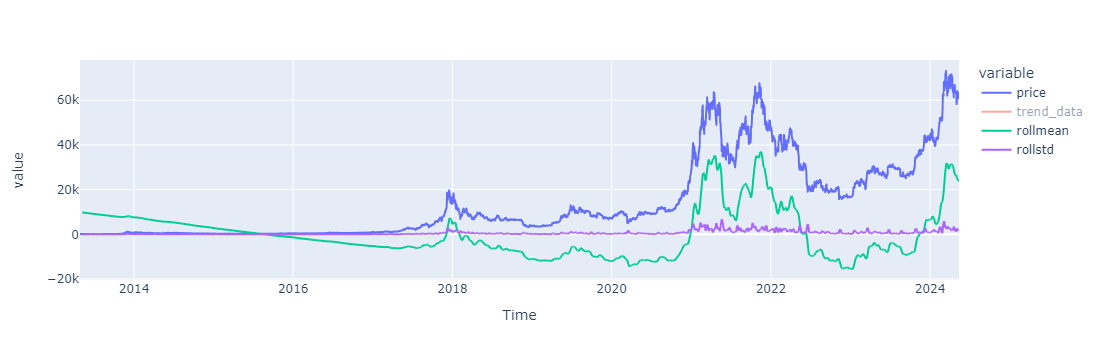

In [218]:
fig = px.line(df,x=df.index,y=df.columns)
fig.show()

**Train Model**
---

In [30]:
data.reset_index(drop=True,inplace=True)

In [10]:
data.set_index('Time',inplace=True)

In [15]:
train = data[:round(len(data)*70/100)]['price']
test = data[round(len(data)*70/100):]['price']

In [23]:
len(test)

403

In [18]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [26]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = sm.tsa.arima.ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

predicted=28174.952571, expected=28042.983386
predicted=28040.846146, expected=27934.438713
predicted=27941.171084, expected=27968.128047
predicted=27970.063406, expected=28351.236994
predicted=28334.967050, expected=29657.974137
predicted=29621.340223, expected=30260.936109
predicted=30251.938357, expected=29904.138695
predicted=29959.258972, expected=30405.027313
predicted=30456.282817, expected=30468.408701
predicted=30493.519653, expected=30312.161880
predicted=30330.727834, expected=30304.807515
predicted=30315.458418, expected=29467.459829
predicted=29492.396131, expected=30365.904168
predicted=30345.305440, expected=28833.217501
predicted=28838.635878, expected=28255.578249
predicted=28278.806620, expected=27300.157129
predicted=27289.779502, expected=27861.640663
predicted=27806.723377, expected=27606.578348
predicted=27539.930006, expected=27511.635682
predicted=27493.743095, expected=28351.218248
predicted=28324.011410, expected=28352.191321
predicted=28348.700388, expected=2

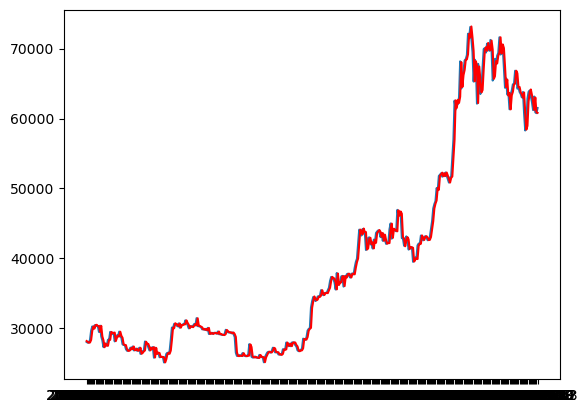

In [22]:

fig = px.line(df,x=df.index,y=df.columns)
fig.show()

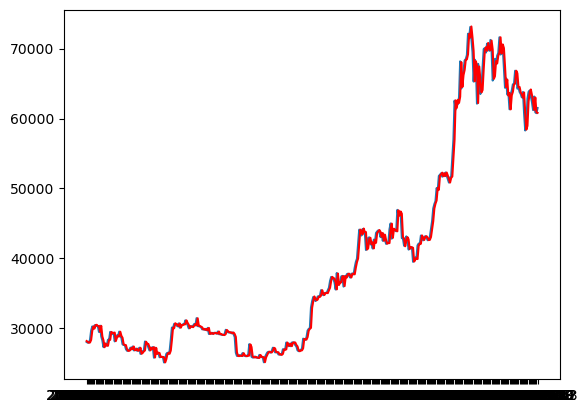

In [22]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

In [24]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4031
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -32599.601
Date:                Wed, 15 May 2024   AIC                          65211.202
Time:                        22:07:36   BIC                          65249.011
Sample:                             0   HQIC                         65224.600
                               - 4031                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0428      0.007     -5.796      0.000      -0.057      -0.028
ar.L2         -0.0006      0.008     -0.079      0.937      -0.015       0.014
ar.L3          0.0406      0.008      4.856      0.0